In [11]:
!git clone https://github.com/zalandoresearch/fashion-mnist.git

fatal: destination path 'fashion-mnist' already exists and is not an empty directory.


In [12]:
!ls

fashion-mnist  fm  main.html  main.ipynb  submission.csv


In [13]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [14]:
x_train, y_train = load_mnist('./fashion-mnist/data/fashion', kind='train')
x_test, y_test = load_mnist('./fashion-mnist/data/fashion', kind='t10k')

In [15]:
import keras
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 5

# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


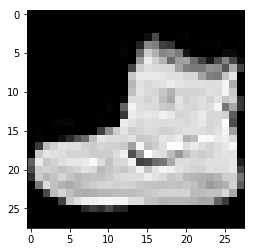

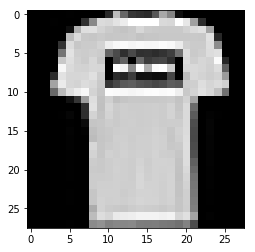

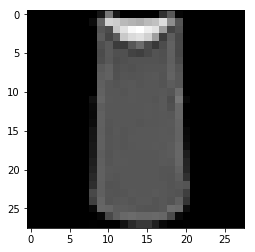

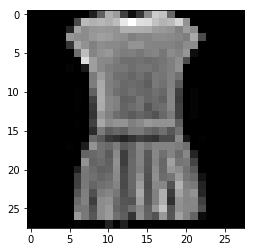

In [16]:
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

def display(i):
    plt.imshow(np.reshape(x_train[i], (28, 28)), cmap=plt.get_cmap('gray'))
    plt.show()

for i in range(4):
    display(i)

In [54]:
from keras.regularizers import l1
from keras.layers import Dropout, GlobalAveragePooling2D

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(GlobalAveragePooling2D())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [55]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
global_average_pooling2d_5 ( (None, 64)                0         
__________

In [56]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
rotation_range=10,
)

In [57]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
          epochs=40,
          steps_per_epoch=len(x_train) / 32,
          validation_data=(x_test, y_test),
          verbose=1)

#model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=40)

Epoch 1/40
1875/1875 [==============================] - 17s - loss: 0.6058 - acc: 0.7804 - val_loss: 0.4806 - val_acc: 0.8240
Epoch 2/40
1875/1875 [==============================] - 17s - loss: 0.4326 - acc: 0.8408 - val_loss: 0.4151 - val_acc: 0.8434
Epoch 3/40
1875/1875 [==============================] - 17s - loss: 0.3821 - acc: 0.8601 - val_loss: 0.3658 - val_acc: 0.8673
Epoch 4/40
1875/1875 [==============================] - 17s - loss: 0.3522 - acc: 0.8693 - val_loss: 0.3585 - val_acc: 0.8715
Epoch 5/40
1875/1875 [==============================] - 17s - loss: 0.3317 - acc: 0.8766 - val_loss: 0.3438 - val_acc: 0.8751
Epoch 6/40
1875/1875 [==============================] - 17s - loss: 0.3147 - acc: 0.8832 - val_loss: 0.3264 - val_acc: 0.8826
Epoch 7/40
1875/1875 [==============================] - 17s - loss: 0.2980 - acc: 0.8894 - val_loss: 0.3442 - val_acc: 0.8747
Epoch 8/40
1875/1875 [==============================] - 17s - loss: 0.2869 - acc: 0.8931 - val_loss: 0.3169 - val_acc:

In [58]:
from keras.regularizers import l2
from keras.layers import Dropout, GlobalAveragePooling2D

model2 = Sequential()
model2.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [59]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 64)                0         
__________

In [60]:
model2.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
          epochs=30,
          steps_per_epoch=len(x_train) / 32,
          validation_data=(x_test, y_test),
          verbose=1)

#model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=40)

Epoch 1/30
1875/1875 [==============================] - 18s - loss: 0.6190 - acc: 0.7689 - val_loss: 0.4873 - val_acc: 0.8158
Epoch 2/30
1875/1875 [==============================] - 18s - loss: 0.4238 - acc: 0.8446 - val_loss: 0.3842 - val_acc: 0.8579
Epoch 3/30
1875/1875 [==============================] - 18s - loss: 0.3717 - acc: 0.8629 - val_loss: 0.3720 - val_acc: 0.8635
Epoch 4/30
1875/1875 [==============================] - 18s - loss: 0.3401 - acc: 0.8727 - val_loss: 0.3407 - val_acc: 0.8781
Epoch 5/30
1875/1875 [==============================] - 18s - loss: 0.3240 - acc: 0.8796 - val_loss: 0.3408 - val_acc: 0.8735
Epoch 6/30
1875/1875 [==============================] - 18s - loss: 0.3101 - acc: 0.8851 - val_loss: 0.3239 - val_acc: 0.8818
Epoch 7/30
1875/1875 [==============================] - 18s - loss: 0.2936 - acc: 0.8898 - val_loss: 0.3177 - val_acc: 0.8828
Epoch 8/30
1875/1875 [==============================] - 18s - loss: 0.2819 - acc: 0.8948 - val_loss: 0.3129 - val_acc:

In [61]:
from sklearn.metrics import accuracy_score

preds = (model.predict(x_test) + model2.predict(x_test)) / 2
preds = np.argmax(preds, 1)

_, y_categories = load_mnist('./fashion-mnist/data/fashion', kind='t10k')

print(accuracy_score(y_categories, preds))

with open('final_ensembled_submission.csv', 'w') as f:
    f.write('Id,Class\n')
    for i, c in enumerate(preds):
        f.write('{},{}\n'.format(i, c))

0.9107


In [62]:
!head submission.csv

Id,Class
0,9
1,2
2,1
3,1
4,6
5,1
6,4
7,6
8,5


## Summary
Simple ensembling (averaging) of two CNNS. 
One has additional dense layers, the second one Global Average Pooling.
Simple rotations are used for data augmentation.